# **HEART ATTACK CLASSIFICATION**

##  **Introduction**

The **Heart Attack Dataset** is designed to analyze patient attributes to predict the likelihood of a heart attack. Through **Exploratory Data Analysis (EDA)**, we aim to gain insights into the key factors influencing heart disease and prepare the dataset for building predictive models.



###  **Objectives of EDA**
1. **Understanding Data Structure:**
   - Inspecting the dataset’s size, structure, and data types.
   - Identifying numerical and categorical features.

2. **Handling Missing Values & Duplicates:**
   - Checking for missing values and their proportion.
   - Identifying and removing duplicate entries if present.

3. **Data Distribution & Summary Statistics:**
   - Analyzing numerical features like age, cholesterol levels, blood pressure, etc.
   - Assessing categorical features like gender, chest pain type, etc.

4. **Outlier Detection & Treatment:**
   - Detecting outliers in numerical features using statistical techniques (e.g., IQR method).
   - Deciding on appropriate handling (e.g., capping or removal).

5. **Feature Correlation Analysis:**
   - Using correlation matrices to identify relationships between features.
   - Identifying features that are most related to the target variable (`Heart Attack`).

6. **Categorical Feature Encoding:**
   - Converting categorical features to numerical representations using **One-Hot Encoding** or **Label Encoding**.

7. **Feature Scaling:**
   - Scaling numerical features to enhance model performance.





###  **Outcome of EDA:**
The EDA process will produce a **cleaned, transformed, and well-prepared dataset**, ready for building accurate and reliable machine learning models to predict the likelihood of heart attacks.



### **Importing Libraries**

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### **Importing dataset**

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Projects/Heart Attack.csv')

### **Analysing top 10 data**

In [3]:
df.head(10)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
5,58,0,61,112,58,87.0,1.83,0.004,negative
6,32,0,40,179,68,102.0,0.71,0.003,negative
7,63,1,60,214,82,87.0,300.00,2.370,positive
8,44,0,60,154,81,135.0,2.35,0.004,negative
9,67,1,61,160,95,100.0,2.84,0.011,negative


### **Checking information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


### **Checking null values**

In [5]:
df.isna().sum()

,0
age,0
gender,0
impluse,0
pressurehight,0
pressurelow,0
glucose,0
kcm,0
troponin,0
class,0


### **Checking duplicate rows**

In [6]:
df.duplicated().sum()

0

### **Boxplot**

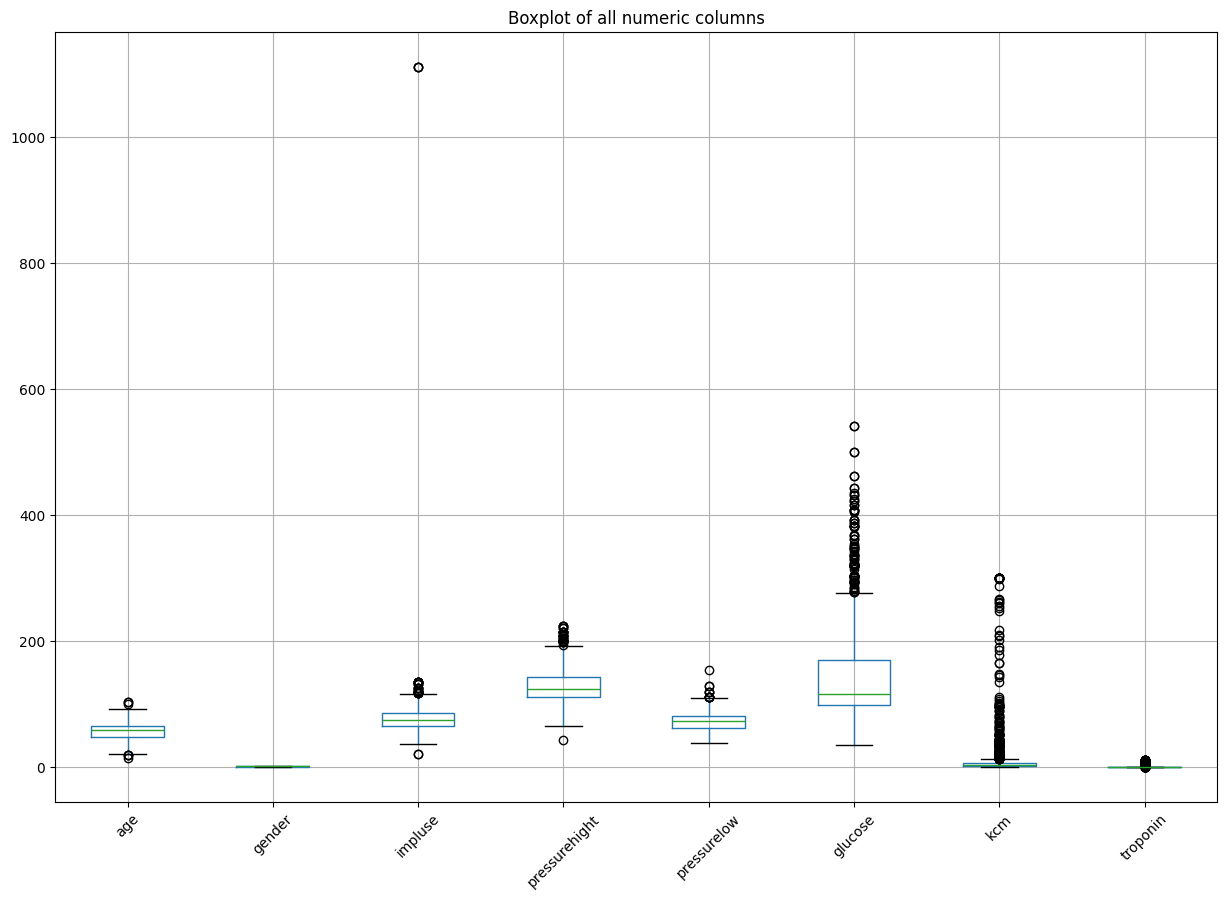

In [7]:
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15,10))
df[numeric_cols].boxplot()
plt.title('Boxplot of all numeric columns')
plt.xticks(rotation=45)
plt.show()

### **Filling outliers using median**

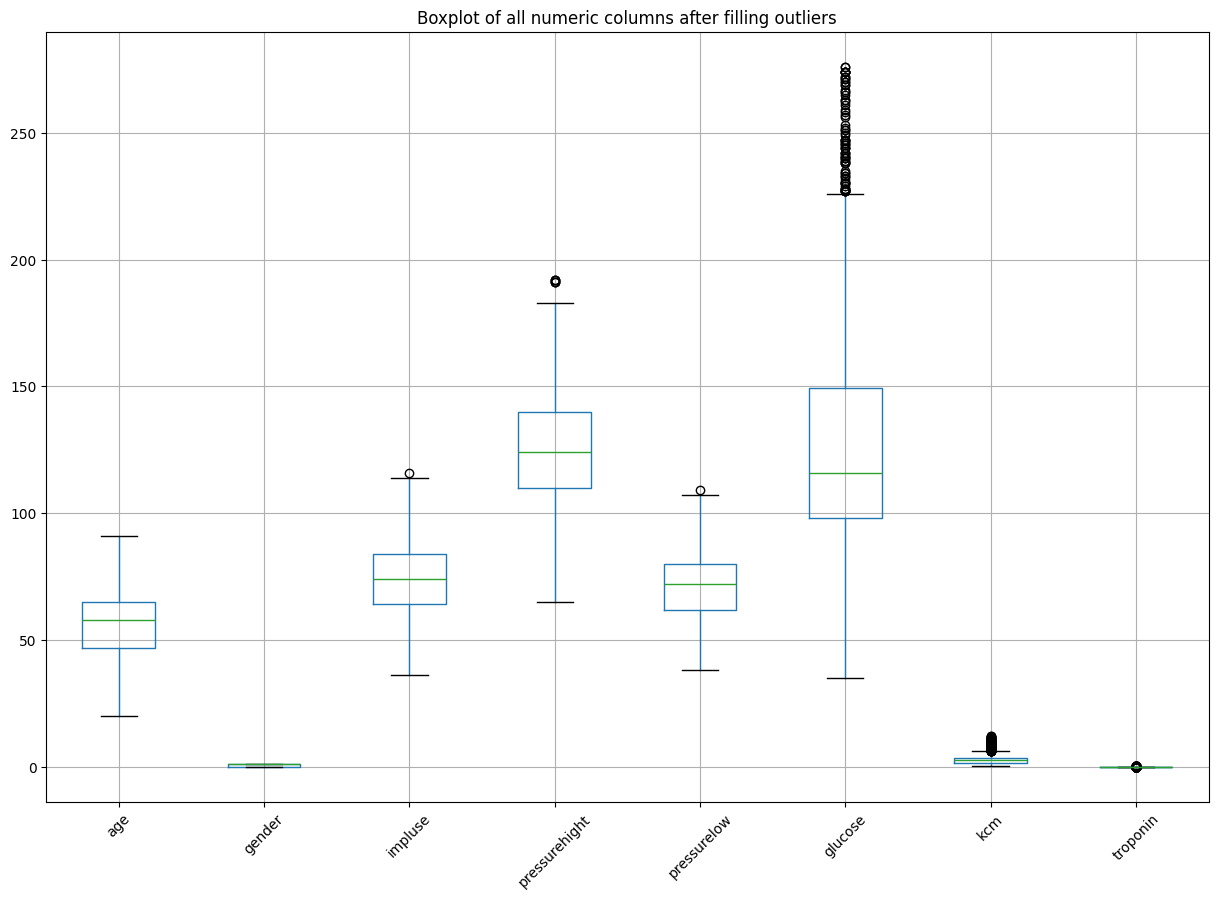

In [8]:
def fill_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = df[column].median()
    df[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

    return df


for col in numeric_cols:
    df = fill_outliers_with_median(df, col)

plt.figure(figsize=(15,10))
df[numeric_cols].boxplot()
plt.title('Boxplot of all numeric columns after filling outliers')
plt.xticks(rotation=45)
plt.show()

## **Statistical Analysis**

### Covariance

In [9]:
df.cov(numeric_only=True)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
age,176.986122,-0.617606,-2.663189,2.250184,-0.468264,-7.078017,-1.581855,0.080682
gender,-0.617606,0.224701,-0.017807,0.258592,-0.029426,-0.196344,0.025233,0.000936
impluse,-2.663189,-0.017807,180.823001,-6.175689,23.041701,0.614570,-0.048828,0.003432
pressurehight,2.250184,0.258592,-6.175689,519.471974,178.187184,8.931894,-0.195722,-0.019730
pressurelow,-0.468264,-0.029426,23.041701,178.187184,175.748967,6.755785,0.011330,-0.003029
glucose,-7.078017,-0.196344,0.614570,8.931894,6.755785,2149.754186,1.872224,0.026277
kcm,-1.581855,0.025233,-0.048828,-0.195722,0.011330,1.872224,4.098711,-0.000286
troponin,0.080682,0.000936,0.003432,-0.019730,-0.003029,0.026277,-0.000286,0.000998


### Correlation

In [10]:
df.corr(numeric_only=True)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
age,1.000000,-0.097935,-0.014887,0.007421,-0.002655,-0.011475,-0.058732,0.192003
gender,-0.097935,1.000000,-0.002794,0.023935,-0.004683,-0.008933,0.026293,0.062543
impluse,-0.014887,-0.002794,1.000000,-0.020150,0.129253,0.000986,-0.001794,0.008080
pressurehight,0.007421,0.023935,-0.020150,1.000000,0.589724,0.008452,-0.004242,-0.027406
pressurelow,-0.002655,-0.004683,0.129253,0.589724,1.000000,0.010991,0.000422,-0.007235
glucose,-0.011475,-0.008933,0.000986,0.008452,0.010991,1.000000,0.019945,0.017942
kcm,-0.058732,0.026293,-0.001794,-0.004242,0.000422,0.019945,1.000000,-0.004476
troponin,0.192003,0.062543,0.008080,-0.027406,-0.007235,0.017942,-0.004476,1.000000


### Heatmap

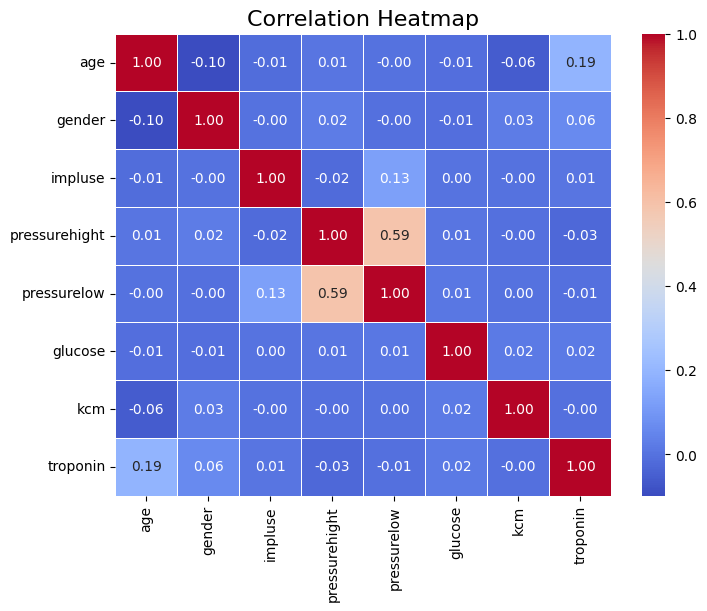

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Describe

In [12]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.213798,0.659591,75.092494,125.266869,71.844579,130.037680,3.036694,0.021381
std,13.303613,0.474027,13.447044,22.791928,13.257035,46.365442,2.024527,0.031586
min,20.000000,0.000000,36.000000,65.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,84.000000,140.000000,80.000000,149.500000,3.480000,0.018000
max,91.000000,1.000000,116.000000,192.000000,109.000000,276.000000,12.020000,0.203000


### **Count Plot**

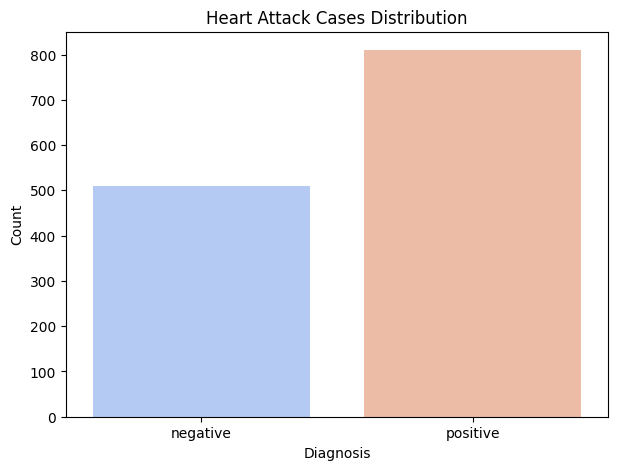

In [13]:
plt.figure(figsize=(7, 5))
sns.countplot(x="class", data=df, palette="coolwarm")
plt.title("Heart Attack Cases Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

### **Histogram**

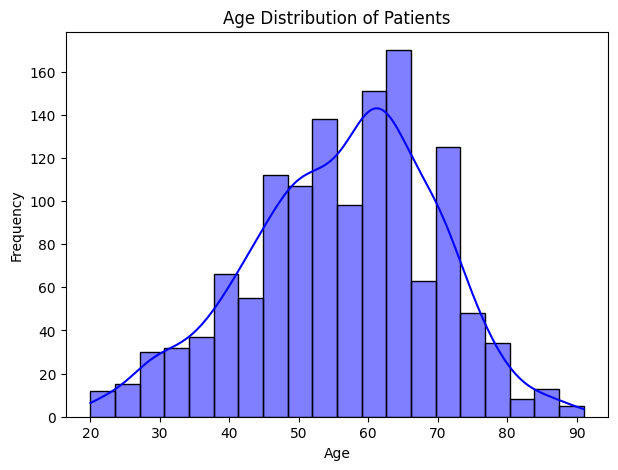

In [14]:
plt.figure(figsize=(7, 5))
sns.histplot(df["age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### **Pie Chart**

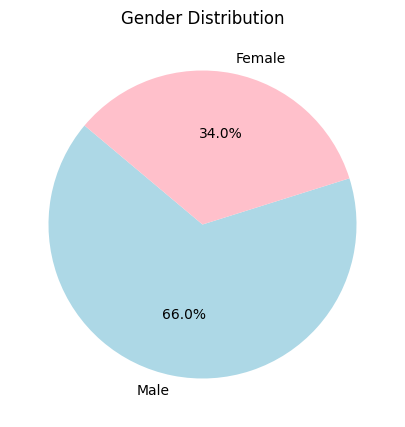

In [15]:
plt.figure(figsize=(7, 5))
gender_counts = df["gender"].value_counts()
plt.pie(gender_counts, labels=["Male", "Female"], autopct="%1.1f%%", colors=["lightblue", "pink"], startangle=140)
plt.title("Gender Distribution")
plt.show()

### **Line Chart**

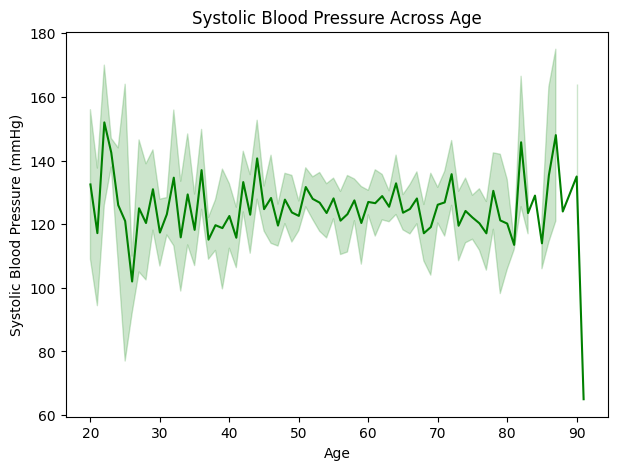

In [16]:
plt.figure(figsize=(7, 5))
sns.lineplot(x="age", y="pressurehight", data=df, color="green")
plt.title("Systolic Blood Pressure Across Age")
plt.xlabel("Age")
plt.ylabel("Systolic Blood Pressure (mmHg)")
plt.show()

### **Selecting x and y**

In [17]:
x = df.drop('class', axis=1)

In [18]:
x.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64.0,1,66.0,160.0,83.0,160.0,1.80,0.012
1,21.0,1,94.0,98.0,46.0,116.0,6.75,0.014
2,55.0,1,64.0,160.0,77.0,270.0,1.99,0.003
3,64.0,1,70.0,120.0,55.0,270.0,2.85,0.122
4,55.0,1,64.0,112.0,65.0,116.0,1.08,0.003


In [19]:
y = df['class']

### **LabelEncoding y**

In [20]:
le = LabelEncoder()
y = le.fit_transform(y)
y_encoded = pd.DataFrame(y, columns = ['class'])

In [21]:
y_encoded.head()

,class
0,0
1,1
2,0
3,1
4,0


### **Scatterplot**

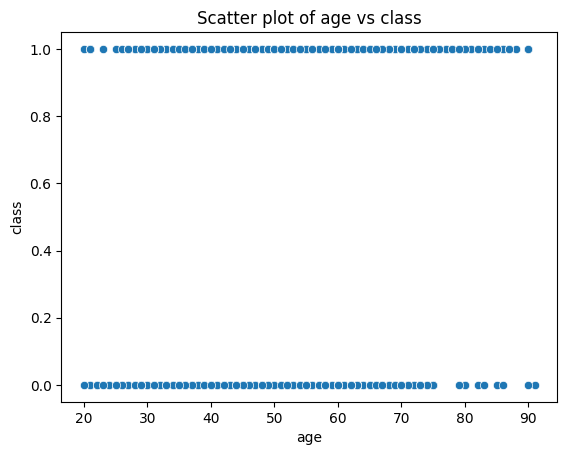

In [22]:
sns.scatterplot(df,x='age', y=y)
plt.xlabel('age')
plt.ylabel('class')
plt.title(f'Scatter plot of age vs class')
plt.show()

### **Train Test Splitting**

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### **Classifying Heart Attack Probability using Decision Tree Classifier**

In [24]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

### **Checking Accuracy**

Decision Tree Accuracy: 0.9356060606060606
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       101
           1       0.96      0.93      0.95       163

    accuracy                           0.94       264
   macro avg       0.93      0.94      0.93       264
weighted avg       0.94      0.94      0.94       264



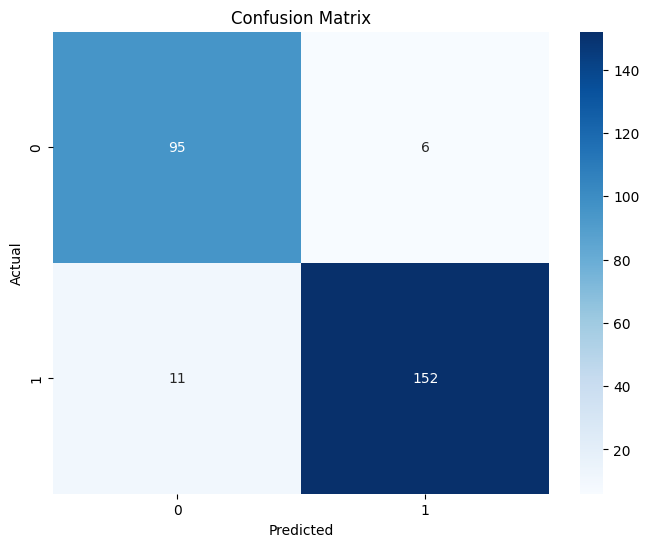

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##  **Summary**

The EDA process aims to explore and prepare the **Heart Attack Dataset** for building predictive models to determine the likelihood of a heart attack based on patient attributes.



###  **1. Data Understanding & Initial Analysis**
- **Loaded Dataset:** Successfully imported using Pandas.
- **Data Inspection:** Displayed the first 10 rows and checked dataset structure using `df.info()`.
- **Checking Missing Values & Duplicates:**
  - No missing values detected.
  - Duplicate rows were checked and found none.



###  **2. Statistical & Graphical Analysis**
- **Statistical Measures:**
  - Covariance and Correlation matrices were calculated to identify relationships between numerical features.
  - Summary statistics (`df.describe()`) were generated to assess the spread and distribution of numerical features.

- **Visualizations:**  
  - **Boxplots:** Displayed potential outliers for numerical columns.
  - **Heatmap:** Displayed correlations between numerical features.
  - **Count Plot:** Showed the distribution of heart attack cases.
  - **Histogram:** Displayed the distribution of patient ages.
  - **Pie Chart:** Showed the gender distribution (Male & Female).
  - **Line Chart:** Illustrated the relationship between age and systolic blood pressure.
  - **Scatter Plot:** Visualized `age` vs. `class`.



###  **3. Data Preprocessing**
- **Outlier Handling:**
  - Outliers were replaced with the median value of the respective feature using a custom function.

- **Feature Selection:**
  - `X`: All columns except the target variable (`class`).
  - `y`: The target variable (`class`).

- **Encoding Categorical Features:**
  - `LabelEncoder` was used to convert the `class` feature into numerical format (0 or 1).

- **Train-Test Split:**
  - The dataset was split into training and testing sets (80:20 ratio).



###  **4. Model Building & Evaluation**
- **Model Used:** Decision Tree Classifier.
- **Performance Metrics:**
  - Accuracy Score
  - Classification Report (Precision, Recall, F1-Score)
  - Confusion Matrix (Visualized using Seaborn Heatmap)


